## Handwritten digits classification using neural network

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
#So, the ratio of the data distribution is approximately 6:1, 
#with about 85.7% of the data used for training and about 14.3% used for testing.

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
X_train[59999]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

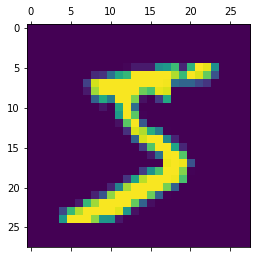

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
X_train = X_train / 255
X_test = X_test / 255 #scaling the data

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28) #converting the 2d array to 1d array

In [16]:
X_train_flattened.shape

(60000, 784)

In [17]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Very simple neural network with no hidden layers

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
# 10 is output and 784 is input
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5) 
#loss= 'sparse_categorical_crossentropy' as the uotput is actual integer number
#if we have done one hot encoding on the y parameter we would have used CategoricalCrossentropy

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4707 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9251


In [19]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2691 - accuracy: 0.9265


[0.26906701922416687, 0.9265000224113464]

In [20]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 965us/step


array([3.11574675e-02, 2.25982333e-07, 5.09855337e-02, 9.59215224e-01,
       3.52249271e-03, 1.10753648e-01, 1.67184930e-06, 9.99783337e-01,
       1.14963055e-01, 6.62288189e-01], dtype=float32)

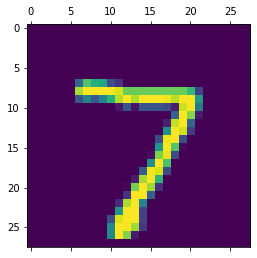

In [21]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [22]:
np.argmax(y_predicted[0]) #argmax will predict the maximum value in the array

7

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [25]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    2,    0,    5,    3,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   9,    8,  916,   19,    7,    3,   12,   11,   43,    4],
       [   2,    0,   17,  923,    1,   22,    2,   10,   25,    8],
       [   2,    1,    5,    2,  920,    0,    8,    4,   10,   30],
       [   9,    1,    4,   32,    9,  784,    9,    7,   30,    7],
       [  16,    3,    7,    1,    7,   19,  900,    2,    3,    0],
       [   1,    5,   21,    7,    6,    0,    0,  962,    2,   24],
       [   8,    6,    6,   17,    9,   27,    8,   11,  877,    5],
       [  11,    5,    1,   10,   31,    7,    0,   30,    7,  907]])>

Text(69.0, 0.5, 'Truth')

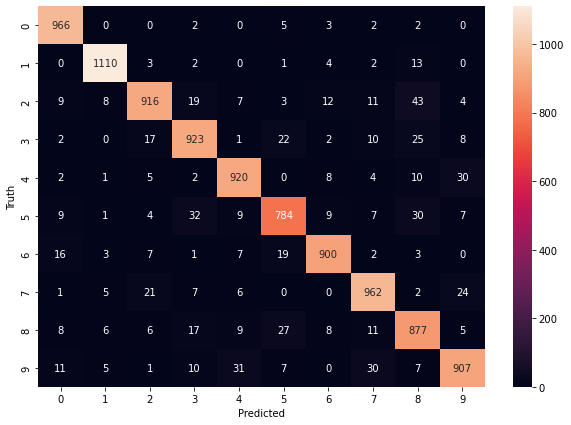

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using hidden layer

In [31]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
#adding the hidden layer(100)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1216 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0852 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0654 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0508 - accuracy: 0.9844


In [32]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0796 - accuracy: 0.9770


[0.07963762432336807, 0.9769999980926514]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

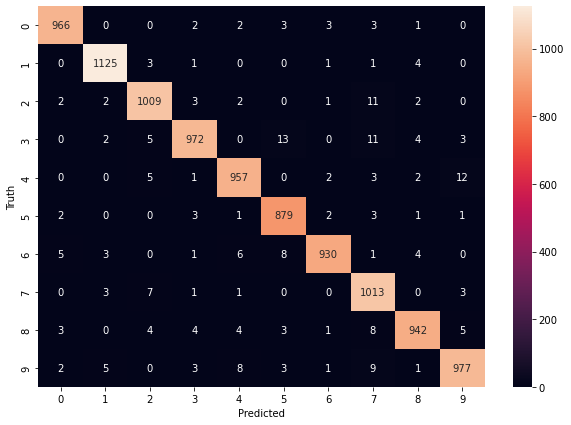

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d') #'d': This formats the cell values as integers.
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

#now we don't need to make flatten array seperatly as we are using the keras.layers.Flatten
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2753 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1248 - accuracy: 0.9629
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0417 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0339 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0285 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0866 - accuracy: 0.9755


[0.08660874515771866, 0.9754999876022339]

### Testing the CNN model performance 

In [40]:
from tensorflow.keras import layers, models

In [66]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
#MNIST images are grayscale, so they have only one channel thats why we are using input_shape=(28,28,1)

In [67]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.1398 - accuracy: 0.9585
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0474 - accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0336 - accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0255 - accuracy: 0.9920
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0178 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0143 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0121 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In [69]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0335 - accuracy: 0.9911


[0.03352733328938484, 0.991100013256073]

In [70]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[5.95780571e-15, 2.23886773e-13, 2.48803430e-12, 1.05462084e-10,
        1.08357171e-12, 5.22342586e-13, 2.23369009e-20, 1.00000000e+00,
        8.76969275e-17, 1.57719822e-12],
       [6.25368601e-09, 2.88828794e-10, 1.00000000e+00, 1.53744404e-17,
        2.37134349e-15, 2.31808279e-22, 4.71209904e-10, 6.34064809e-15,
        3.48884028e-14, 4.06072010e-21],
       [6.80875800e-08, 9.99998927e-01, 7.62652996e-10, 9.71135932e-13,
        2.34317156e-07, 1.26194868e-08, 1.57349778e-08, 5.10588904e-08,
        7.58542058e-07, 1.89012590e-11],
       [1.00000000e+00, 1.02307011e-15, 6.95545726e-13, 2.45426080e-18,
        3.21613233e-13, 3.16161930e-16, 3.86355037e-09, 7.77376431e-15,
        1.87325242e-11, 2.97033648e-10],
       [2.29816064e-14, 3.47273490e-12, 1.30148904e-11, 5.58190795e-16,
        9.99999166e-01, 3.78826658e-11, 1.64282013e-13, 2.81546054e-13,
        3.20630740e-12, 8.53248139e-07]], dtype=float32)

In [71]:
y_pred_labels = [np.argmax(i) for i in y_predicted]

In [72]:
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [73]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)